# Прогноз необходимого числа наблюдений эксперимента

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Текущий уровень конверсии: 1%
# Минимальный уровень изменений: +0.1%
# Уровень значимости: 95%
# Требуемая мощность критерия: 90%

In [3]:
P = 1 / 100 # conversion rate
Q = 0.95 # significance level

DIFF = 0.1 / 100

In [4]:
P, DIFF

(0.01, 0.001)

### $Z$-score для заданного уровня значимости.

In [5]:
z = st.norm.ppf(Q)

z

1.6448536269514722

Будем рассматривать приближение биномиального распределения нормальным:

$SEM = \sigma = \sqrt{\frac{p (1 - p)}{n}}$ (утверждается, что это уже SEM - стандартная ошибка выборочного среднего)

$z = \frac{diff}{SEM}$

Выразим $n$:

$n = (\frac{z\sqrt{P(1-P)}}{diff})^2$

In [6]:
N = (((z * np.sqrt(P * (1 - P))) / DIFF)) ** 2

np.round(N)

26785.0

### Оценим мощность критерия.

In [7]:
# изменяя n, влияем на мощность критерия
def criterion_power(n, P, Q, DIFF):
    sigma = np.sqrt( (P * (1 - P)) / n )
    se = sigma
    thr = st.norm.ppf(Q, 0, se)
    beta = st.norm.cdf(thr, DIFF, se)
    power = 1 - beta  # доля верно отклоненных нулевых гипотез

    x = np.linspace(-3*se, 5*se, 100)
    plt.plot(x, st.norm.pdf(x, 0, se))
    plt.plot(x, st.norm.pdf(x, DIFF, se))
    plt.axvline(thr, color='k', linestyle='--')
    plt.fill_between(x, st.norm.pdf(x, 0, se), where=x<thr)
    plt.fill_between(x, st.norm.pdf(x, DIFF, se), where=x>thr)
    plt.title('q=%.2f thr=%.4f power=%.3f' % (Q, thr, power));
    
    return power

Значение мощности критерия для найденного $n$:

0.5

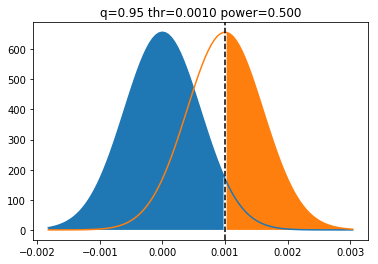

In [8]:
criterion_power(N, P, Q, DIFF)

Подберём $n$, обеспечивающее мощность $90\%$:

0.9000027599107703

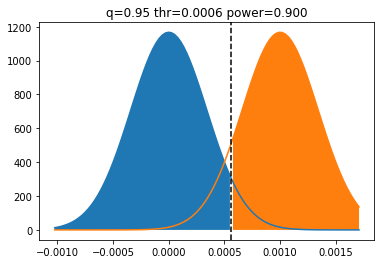

In [9]:
criterion_power(84783, P, Q, DIFF)

### Симулируем эксперимент с подобранными параметрами.

In [10]:
# Визуализируем z-распределение
def plot_zscore(n, P, diff):
    mu = P + diff
    sigma = np.sqrt( mu * (1 - mu) / n )
    data = np.random.normal(mu, sigma, size=int(n))    
    SE = sigma
    z = (np.mean(data) - P) / SE
    q = st.norm.cdf(z)
    x = np.linspace(-3, 3, 100)
    plt.plot(x, st.norm.pdf(x))
    plt.axvline(z, color='k', linestyle='--')
    plt.fill(np.hstack([x[x < z], [z]]),
             np.hstack([st.norm.pdf(x[x < z]), [0]]))
    plt.title('n=%d q=%.4f z=%.3f, mean=%.4f' % (n, q, z, np.mean(data)));

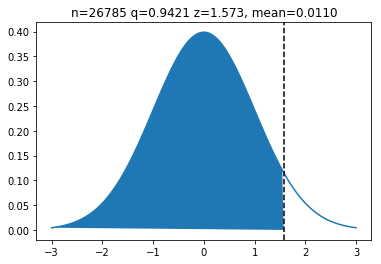

In [11]:
plot_zscore(np.round(N), P, DIFF)

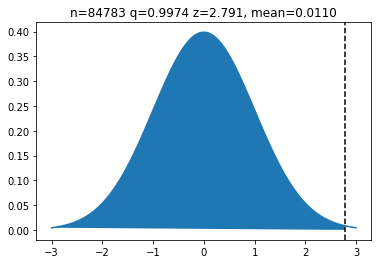

In [12]:
plot_zscore(84783, P, DIFF)